# 대구의 다양한 현상에 따른 대중교통 승객 수의 변화

## 1. 5년간 2012-2016 강수량이 있는 날과 맑은 날 버스 승객 수 비교

In [94]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib 한글 Font 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path='../Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 관련 변수들 선언
DIR_PATH='./Data_도영/'
FILE_NAME1=DIR_PATH+'강수량.xlsx'
FILE_NAME2=DIR_PATH+'버스.xlsx'

In [95]:
# (1) EXCEL File => DataFrame 형태 데이터로 로딩
weatherDF=pd.read_excel(FILE_NAME1)
busDF=pd.read_excel(FILE_NAME2)

# (2) Data 정보 확인
# 요약 정보 확인
print(weatherDF.info(), busDF.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       1827 non-null   datetime64[ns]
 1   지점       1827 non-null   int64         
 2   강수량(mm)  615 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일  자    1827 non-null   datetime64[ns]
 1   요일      1827 non-null   object        
 2   이용자수    1827 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.9+ KB
None
None


In [96]:
# 일부 데이터 확인
print(weatherDF.head(), busDF.head(), sep='\n')

          날짜   지점  강수량(mm)
0 2012-01-01  143      0.2
1 2012-01-02  143      NaN
2 2012-01-03  143      1.0
3 2012-01-04  143      0.5
4 2012-01-05  143      NaN
        일  자 요일      이용자수
0 2012-01-01  일  389720.0
1 2012-01-02  월  735132.0
2 2012-01-03  화  786235.0
3 2012-01-04  수  813140.0
4 2012-01-05  목  776380.0


In [97]:
# 버스 이용자 수 데이터가 확실히 들어 있는지 확인
bus=[]
for i in busDF['이용자수']:
    if i <= 0:
        print(f'0 이하 수 발견 => {i}')
    elif i > 0:
        bus.append('i')

len(bus)

1827

In [98]:
# '강수량' 컬럼의 고유값 -> 값의 종류를 보고 결측지가 없는지 확인
weatherDF['강수량(mm)'].unique()

array([2.00e-01,      nan, 1.00e+00, 5.00e-01, 1.00e-01, 0.00e+00,
       4.50e+00, 3.00e-01, 2.00e+00, 1.50e+00, 3.50e+00, 1.80e+01,
       5.50e+00, 2.50e+00, 6.50e+00, 1.85e+01, 2.50e+01, 1.55e+01,
       3.55e+01, 1.90e+01, 3.00e+00, 1.10e+01, 2.10e+01, 1.05e+01,
       7.50e+00, 4.00e+00, 1.15e+01, 1.25e+01, 2.90e+01, 2.25e+01,
       3.25e+01, 3.35e+01, 2.55e+01, 2.20e+01, 6.00e+00, 7.55e+01,
       2.80e+01, 1.46e+02, 2.15e+01, 1.35e+01, 2.65e+01, 7.00e+00,
       6.80e+01, 9.35e+01, 1.75e+01, 9.50e+00, 4.90e+00, 1.50e+01,
       9.80e+00, 1.54e+01, 1.30e+01, 5.00e+00, 8.00e-01, 1.20e+01,
       4.00e-01, 1.65e+01, 3.20e+01, 1.57e+02, 2.05e+01, 8.00e+00,
       5.65e+01, 1.00e+01, 3.95e+01, 2.40e+01, 4.95e+01, 5.15e+01,
       1.95e+01, 1.45e+01, 1.40e+01, 4.05e+01, 1.60e+01, 2.60e+00,
       4.65e+01, 2.60e+01, 4.00e+01, 3.00e+01, 3.30e+01, 9.50e+01,
       5.05e+01, 3.80e+01, 8.50e+00, 9.00e+00, 8.35e+01, 7.95e+01,
       3.65e+01, 6.50e+01, 3.10e+01, 5.40e+01, 3.50e+01, 5.30e

In [99]:
# 강수량이 없는 날 (nan) 전부 0으로 채우기
weatherDF.fillna(0, inplace=True)
weatherDF

,날짜,지점,강수량(mm)
0,2012-01-01,143,0.2
1,2012-01-02,143,0.0
2,2012-01-03,143,1.0
3,2012-01-04,143,0.5
4,2012-01-05,143,0.0
...,...,...,...
1822,2016-12-27,143,0.5
1823,2016-12-28,143,0.0
1824,2016-12-29,143,0.0
1825,2016-12-30,143,0.0


In [121]:
# 연도별로 나누기 위해 인덱스 찾기
weather_index=[]
bus_index=[]

for i in range(2012,2017):
    weather_index.append(weatherDF[weatherDF['날짜']==f'{i}-12-31'].index)
    bus_index.append(busDF[busDF['일  자']==f'{i}-12-31'].index)


# weather_index.append(weatherDF[weatherDF['날짜']=='2012-12-31'].index)
# weather_index.append(weatherDF[weatherDF['날짜']=='2013-12-31'].index)
# weather_index.append(weatherDF[weatherDF['날짜']=='2014-12-31'].index)
# weather_index.append(weatherDF[weatherDF['날짜']=='2015-12-31'].index)
# weather_index.append(weatherDF[weatherDF['날짜']=='2016-12-31'].index)

# bus_index.append(busDF[busDF['일  자']=='2012-12-31'].index)
# bus_index.append(busDF[busDF['일  자']=='2013-12-31'].index)
# bus_index.append(busDF[busDF['일  자']=='2014-12-31'].index)
# bus_index.append(busDF[busDF['일  자']=='2015-12-31'].index)
# bus_index.append(busDF[busDF['일  자']=='2016-12-31'].index)


for j in weather_index:
    print(f'=> 강수량 연도별 인덱스 {j}')
    
for k in bus_index:
    print(f'=> 버스 연도별 인덱스 {k}')



weatherDF[weatherDF['날짜']=='2012-12-31']

=> 강수량 연도별 인덱스 Int64Index([365], dtype='int64')
=> 강수량 연도별 인덱스 Int64Index([730], dtype='int64')
=> 강수량 연도별 인덱스 Int64Index([1095], dtype='int64')
=> 강수량 연도별 인덱스 Int64Index([1460], dtype='int64')
=> 강수량 연도별 인덱스 Int64Index([1826], dtype='int64')
=> 버스 연도별 인덱스 Int64Index([365], dtype='int64')
=> 버스 연도별 인덱스 Int64Index([730], dtype='int64')
=> 버스 연도별 인덱스 Int64Index([1095], dtype='int64')
=> 버스 연도별 인덱스 Int64Index([1460], dtype='int64')
=> 버스 연도별 인덱스 Int64Index([1826], dtype='int64')


,날짜,지점,강수량(mm)
365,2012-12-31,143,0.0


In [101]:
# 정답지 만들기. 강수량이 있는 날 데이터만 추출

rainDF=weatherDF[weatherDF['강수량(mm)']>0]
rainDF

,날짜,지점,강수량(mm)
0,2012-01-01,143,0.2
2,2012-01-03,143,1.0
3,2012-01-04,143,0.5
15,2012-01-16,143,0.1
17,2012-01-18,143,1.0
...,...,...,...
1814,2016-12-19,143,1.5
1816,2016-12-21,143,18.5
1817,2016-12-22,143,6.0
1821,2016-12-26,143,14.5


In [102]:
# 강수량이 있는 날 행인덱스 보기
rainDF.index

Int64Index([   0,    2,    3,   15,   17,   18,   20,   30,   31,   43,
            ...
            1776, 1783, 1784, 1791, 1795, 1814, 1816, 1817, 1821, 1822],
           dtype='int64', length=525)

In [103]:
# 강수량이 있는 날 행인덱스에 대한 각각의 버스 승객 수를 연도별로 rb2012-2016 리스트에 담는다.
rb2012=[]
rb2013=[]
rb2014=[]
rb2015=[]
rb2016=[]
for i in rainDF.index:
    if i<=365:
        rb2012.append(busDF.iloc[i][2])
    elif i<=730:
        rb2013.append(busDF.iloc[i][2])
    elif i<=1095:
        rb2014.append(busDF.iloc[i][2])
    elif i<=1460:
        rb2015.append(busDF.iloc[i][2])
    elif i<=1826:
        rb2016.append(busDF.iloc[i][2])

rb2012

[389720.0,
 786235.0,
 813140.0,
 797505.0,
 814294.0,
 769559.0,
 612625.0,
 794818.0,
 777136.0,
 782191.0,
 782247.0,
 792133.0,
 889750.0,
 487597.0,
 872592.0,
 908077.0,
 884518.0,
 745531.0,
 548267.0,
 886871.0,
 859978.0,
 837372.0,
 886184.0,
 848778.0,
 714458.0,
 906880.0,
 890812.0,
 900133.0,
 651569.0,
 537265.0,
 868450.0,
 839044.0,
 907140.0,
 921289.0,
 898919.0,
 859258.0,
 978545.0,
 907730.0,
 899032.0,
 645806.0,
 885872.0,
 893425.0,
 890910.0,
 901406.0,
 877330.0,
 759679.0,
 867070.0,
 884426.0,
 725959.0,
 858885.0,
 885488.0,
 670980.0,
 518475.0,
 807068.0,
 858087.0,
 750551.0,
 940283.0,
 832082.0,
 872044.0,
 723864.0,
 481509.0,
 859643.0,
 839905.0,
 906370.0,
 721426.0,
 803496.0,
 669996.0,
 468886.0,
 734450.0,
 814934.0,
 797497.0,
 829129.0,
 866385.0,
 818442.0,
 730986.0,
 856684.0,
 715526.0,
 824296.0,
 920920.0,
 929314.0,
 773829.0,
 515106.0,
 884264.0,
 908113.0,
 918201.0,
 772117.0,
 469039.0,
 659681.0,
 884072.0,
 809266.0,
 669802.0,

In [104]:
busDF

,일 자,요일,이용자수
0,2012-01-01,일,389720.0
1,2012-01-02,월,735132.0
2,2012-01-03,화,786235.0
3,2012-01-04,수,813140.0
4,2012-01-05,목,776380.0
...,...,...,...
1822,2016-12-27,화,701576.0
1823,2016-12-28,수,698132.0
1824,2016-12-29,목,698054.0
1825,2016-12-30,금,691452.0


In [105]:
# 강수량이 있는 날 평균 이용자 수 rbMean2012-2016에 저장
# for i in range(2012,2017):
#     f'rbMean{i}=round(pd.Series(rb{i}).mean())'

rbMean2012=round(pd.Series(rb2012).mean())
rbMean2013=round(pd.Series(rb2013).mean())
rbMean2014=round(pd.Series(rb2014).mean())
rbMean2015=round(pd.Series(rb2015).mean())
rbMean2016=round(pd.Series(rb2016).mean())

print(pd.Series(rb2012).mean(),rbMean2012)

783172.324074074 783172


In [106]:
# 정답지 만들기, 맑은 날 데이터만 추출
sunnyDF=weatherDF[weatherDF['강수량(mm)']==0]
sunnyDF

,날짜,지점,강수량(mm)
1,2012-01-02,143,0.0
4,2012-01-05,143,0.0
5,2012-01-06,143,0.0
6,2012-01-07,143,0.0
7,2012-01-08,143,0.0
...,...,...,...
1820,2016-12-25,143,0.0
1823,2016-12-28,143,0.0
1824,2016-12-29,143,0.0
1825,2016-12-30,143,0.0


In [107]:
# 맑은 날 행인덱스 보기
sunnyDF.index

Int64Index([   1,    4,    5,    6,    7,    8,    9,   10,   11,   12,
            ...
            1812, 1813, 1815, 1818, 1819, 1820, 1823, 1824, 1825, 1826],
           dtype='int64', length=1302)

In [108]:
# 맑은 날 행인덱스에 대한 각각의 버스 승객 수를 연도별로 sb2012-2016 리스트에 담는다.
sb2012=[]
sb2013=[]
sb2014=[]
sb2015=[]
sb2016=[]
for j in sunnyDF.index:
    if j<=365:
        sb2012.append(busDF.iloc[j][2])
    elif j<=730:
        sb2013.append(busDF.iloc[j][2])
    elif j<=1095:
        sb2014.append(busDF.iloc[j][2])
    elif j<=1460:
        sb2015.append(busDF.iloc[j][2])
    elif j<=1826:
        sb2016.append(busDF.iloc[j][2])

In [109]:
# 맑은 날 평균 이용자 수 sunnyMean에 저장
for i in range(2012,2017):
    f'sbMean{i}=round(pd.Series(sb{i}).mean())'

# sbMean2012=round(pd.Series(sb2012).mean())
# sbMean2013=round(pd.Series(sb2013).mean())
# sbMean2014=round(pd.Series(sb2014).mean())
# sbMean2015=round(pd.Series(sb2015).mean())
# sbMean2016=round(pd.Series(sb2016).mean())

print(pd.Series(sb2012).mean(), sbMean2012)

784989.7248062015 784990


In [110]:
print(f'2012년 => 강수량이 있는 날 버스 승객 수 평균은 {rbMean2012}, 맑은 날 버스 승객 수 평균은 {sbMean2012}',
      f'2013년 => 강수량이 있는 날 버스 승객 수 평균은 {rbMean2013}, 맑은 날 버스 승객 수 평균은 {sbMean2013}',
      f'2014년 => 강수량이 있는 날 버스 승객 수 평균은 {rbMean2014}, 맑은 날 버스 승객 수 평균은 {sbMean2014}',
      f'2015년 => 강수량이 있는 날 버스 승객 수 평균은 {rbMean2015}, 맑은 날 버스 승객 수 평균은 {sbMean2015}',
      f'2016년 => 강수량이 있는 날 버스 승객 수 평균은 {rbMean2016}, 맑은 날 버스 승객 수 평균은 {sbMean2016}',sep='\n')

2012년 => 강수량이 있는 날 버스 승객 수 평균은 783172, 맑은 날 버스 승객 수 평균은 784990
2013년 => 강수량이 있는 날 버스 승객 수 평균은 786554, 맑은 날 버스 승객 수 평균은 798571
2014년 => 강수량이 있는 날 버스 승객 수 평균은 767495, 맑은 날 버스 승객 수 평균은 791447
2015년 => 강수량이 있는 날 버스 승객 수 평균은 719482, 맑은 날 버스 승객 수 평균은 725528
2016년 => 강수량이 있는 날 버스 승객 수 평균은 669957, 맑은 날 버스 승객 수 평균은 679635


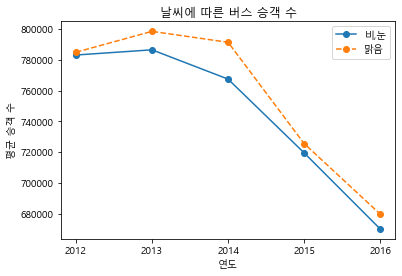

In [111]:
# 그래프 그리기

plt.plot([2012,2013,2014,2015,2016],[rbMean2012,rbMean2013,rbMean2014,rbMean2015,rbMean2016],'o-')
plt.plot([2012,2013,2014,2015,2016],[sbMean2012,sbMean2013,sbMean2014,sbMean2015,sbMean2016], 'o--')
plt.title('날씨에 따른 버스 승객 수')
plt.xticks(range(2012,2017))          # x축 눈금 지정
plt.xlabel('연도')
plt.ylabel('평균 승객 수')
plt.legend(['비,눈','맑음'])
plt.show()

# 2. 5년간 2012-2016 평일 주말 버스 승객 수 비교

In [112]:
# 평일 주말에 따라 버스 이용객 수를 연도별로 나누어 각각 저장한다.
week2012=[]
week2013=[]
week2014=[]
week2015=[]
week2016=[]
normal2012=[]
normal2013=[]
normal2014=[]
normal2015=[]
normal2016=[]

for k in busDF.index:
    if k<=365:
        if k%7==0 or k%7==6:
            week2012.append(busDF.iloc[k][2])
        elif k%7==1 or k%7==2 or k%7==3 or k%7==4 or k%7==5:
            normal2012.append(busDF.iloc[k][2])
    elif k<=730:
        if k%7==0 or k%7==6:
            week2013.append(busDF.iloc[k][2])
        elif k%7==1 or k%7==2 or k%7==3 or k%7==4 or k%7==5:
            normal2013.append(busDF.iloc[k][2])
    elif k<=1095:
        if k%7==0 or k%7==6:
            week2014.append(busDF.iloc[k][2])
        elif k%7==1 or k%7==2 or k%7==3 or k%7==4 or k%7==5:
            normal2014.append(busDF.iloc[k][2])
    elif k<=1460:
        if k%7==0 or k%7==6:
            week2015.append(busDF.iloc[k][2])
        elif k%7==1 or k%7==2 or k%7==3 or k%7==4 or k%7==5:
            normal2015.append(busDF.iloc[k][2])
    elif k<=1826:
        if k%7==0 or k%7==6:
            week2016.append(busDF.iloc[k][2])
        elif k%7==1 or k%7==2 or k%7==3 or k%7==4 or k%7==5:
            normal2016.append(busDF.iloc[k][2])        

In [113]:
busDF

,일 자,요일,이용자수
0,2012-01-01,일,389720.0
1,2012-01-02,월,735132.0
2,2012-01-03,화,786235.0
3,2012-01-04,수,813140.0
4,2012-01-05,목,776380.0
...,...,...,...
1822,2016-12-27,화,701576.0
1823,2016-12-28,수,698132.0
1824,2016-12-29,목,698054.0
1825,2016-12-30,금,691452.0


In [114]:
# 평일과 주말 평균 승객 수
for i in range(2012,2017):
    f'wkMean{i}=round(pd.Series(week{i}).mean())'
    f'nmMean{i}=round(pd.Series(normal{i}).mean())'

# wkMean2012=round(pd.Series(week2012).mean())
# wkMean2013=round(pd.Series(week2013).mean())
# wkMean2014=round(pd.Series(week2014).mean())
# wkMean2015=round(pd.Series(week2015).mean())
# wkMean2016=round(pd.Series(week2016).mean())

# nmMean2012=round(pd.Series(normal2012).mean())
# nmMean2013=round(pd.Series(normal2013).mean())
# nmMean2014=round(pd.Series(normal2014).mean())
# nmMean2015=round(pd.Series(normal2015).mean())
# nmMean2016=round(pd.Series(normal2016).mean())

In [115]:
print(f'2012년 주말 버스 승객 수 평균은 {wkMean2012}, 평일 버스 승객 수 평균은 {nmMean2012}', 
      f'2013년 주말 버스 승객 수 평균은 {wkMean2013}, 평일 버스 승객 수 평균은 {nmMean2013}', 
      f'2014년 주말 버스 승객 수 평균은 {wkMean2014}, 평일 버스 승객 수 평균은 {nmMean2014}', 
      f'2015년 주말 버스 승객 수 평균은 {wkMean2015}, 평일 버스 승객 수 평균은 {nmMean2015}', 
      f'2016년 주말 버스 승객 수 평균은 {wkMean2016}, 평일 버스 승객 수 평균은 {nmMean2016}', sep='\n') 

2012년 주말 버스 승객 수 평균은 620946, 평일 버스 승객 수 평균은 850232
2013년 주말 버스 승객 수 평균은 632091, 평일 버스 승객 수 평균은 860257
2014년 주말 버스 승객 수 평균은 628052, 평일 버스 승객 수 평균은 847102
2015년 주말 버스 승객 수 평균은 570939, 평일 버스 승객 수 평균은 784625
2016년 주말 버스 승객 수 평균은 535836, 평일 버스 승객 수 평균은 733591


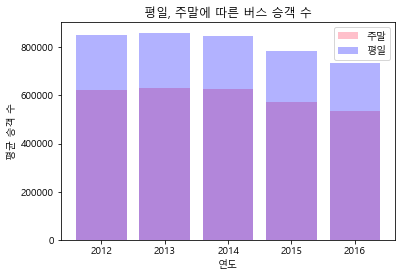

In [116]:
# 그래프 그리기 

plt.bar([2012,2013,2014,2015,2016],[wkMean2012,wkMean2013,wkMean2014,wkMean2015,wkMean2016],color='pink')
plt.bar([2012,2013,2014,2015,2016],[nmMean2012,nmMean2013,nmMean2014,nmMean2015,nmMean2016],alpha=0.3,color='b')
plt.title('평일, 주말에 따른 버스 승객 수')
plt.xlabel('연도')
plt.ylabel('평균 승객 수')
plt.legend(['주말','평일'])
plt.show()

# 3. 5년간 요일별 평균 버스 승객 수

In [117]:
# 요일별 버스 승객 수를 나누어 각각 리스트에 저장한다.
Mon=[]
Tue=[]
Wed=[]
Thu=[]
Fri=[]
Sat=[]
Sun=[]
for i in busDF.index:
    if i%7==1:
        Mon.append(busDF.iloc[i][2])
    elif i%7==2:
        Tue.append(busDF.iloc[i][2])
    elif i%7==3:
        Wed.append(busDF.iloc[i][2])
    elif i%7==4:
        Thu.append(busDF.iloc[i][2])   
    elif i%7==5:
        Fri.append(busDF.iloc[i][2])
    elif i%7==6:
        Sat.append(busDF.iloc[i][2])
    elif i%7==0:
        Sun.append(busDF.iloc[i][2])

In [118]:
# 요일별 평균 승객 수
MonMean=round(pd.Series(Mon).mean())
TueMean=round(pd.Series(Tue).mean())
WedMean=round(pd.Series(Wed).mean())
ThuMean=round(pd.Series(Thu).mean())
FriMean=round(pd.Series(Fri).mean())
SatMean=round(pd.Series(Sat).mean())
SunMean=round(pd.Series(Sun).mean())

In [119]:
print(f'월요일 버스 평균 승객 수 : {MonMean}',
      f'화요일 버스 평균 승객 수 : {TueMean}',
      f'수요일 버스 평균 승객 수 : {WedMean}',
      f'목요일 버스 평균 승객 수 : {ThuMean}',
      f'금요일 버스 평균 승객 수 : {FriMean}',
      f'토요일 버스 평균 승객 수 : {SatMean}',
      f'일요일 버스 평균 승객 수 : {SunMean}',sep='\n')

월요일 버스 평균 승객 수 : 796573
화요일 버스 평균 승객 수 : 816492
수요일 버스 평균 승객 수 : 822768
목요일 버스 평균 승객 수 : 809853
금요일 버스 평균 승객 수 : 830123
토요일 버스 평균 승객 수 : 691031
일요일 버스 평균 승객 수 : 503968


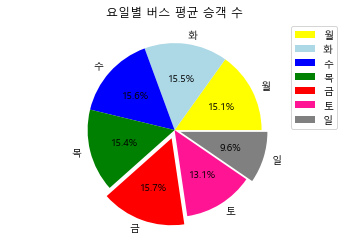

In [120]:
# 그래프 그리기
plt.title('요일별 버스 평균 승객 수')
plt.axis('equal')     # x,y축의 범위를 동일하게 하기
plt.pie([MonMean,TueMean,WedMean,ThuMean,FriMean,SatMean,SunMean],
        labels=['월','화','수','목','금','토','일'],
        colors=['yellow','lightblue','blue','green','red','deeppink','gray'],
        explode=(0,0,0,0,0.1,0,0.07),autopct='%.1f%%')
plt.legend()
plt.show()